# Aprendizaje No Supervisado

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## PCA

In [3]:
# Simulación de datos
np.random.seed(0)
mean = [70, 70]  # Media de las calificaciones
cov = [[40, 30], [40, 50]]  # Matriz de covarianza

# Generar datos de calificaciones de estudiantes
calificaciones = np.random.multivariate_normal(mean, cov, 1000)

# Convertir a un DataFrame de pandas para mayor comodidad
df = pd.DataFrame(calificaciones, columns=['Matemáticas', 'Ciencias'])

/var/folders/65/mz3st45n0jz6qz9cp_f5cr9m0000gn/T/ipykernel_15333/1702845215.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  calificaciones = np.random.multivariate_normal(mean, cov, 1000)


<IPython.core.display.Javascript object>


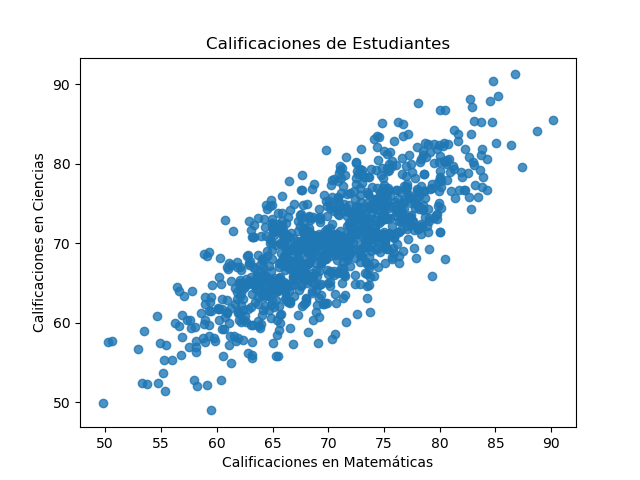

In [4]:
# Visualizar los datos generados
plt.figure('Scatter plot')
plt.scatter(df['Matemáticas'], df['Ciencias'], alpha=0.8)
plt.title('Calificaciones de Estudiantes')
plt.xlabel('Calificaciones en Matemáticas')
plt.ylabel('Calificaciones en Ciencias')
plt.show()

In [5]:
# Aplicar PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(df)

# Visualizar la varianza explicada por los componentes principales
varianza_explicada = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", varianza_explicada)

Varianza explicada por cada componente principal: [0.88898399 0.11101601]


<IPython.core.display.Javascript object>


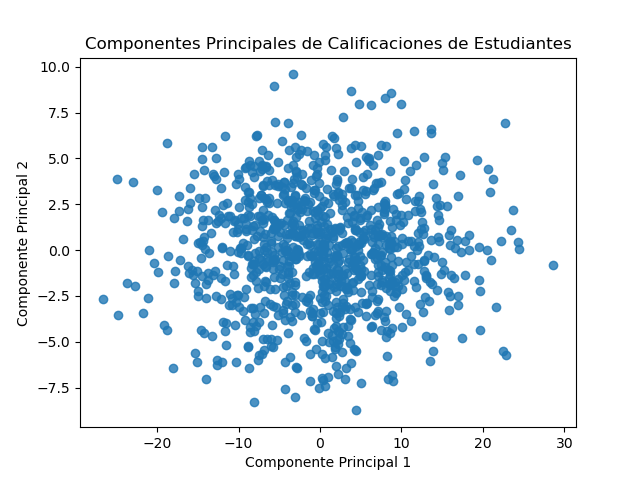

In [6]:
# Visualizar los datos después de PCA
plt.figure('PCA Plot')
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1], alpha=0.8)
plt.title('Componentes Principales de Calificaciones de Estudiantes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

## UMAP

In [ ]:
import umap

In [ ]:
np.random.seed(42)
high_dim_data = np.random.rand(100, 20)

In [ ]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
umap_result = umap_model.fit_transform(high_dim_data)

In [ ]:
plt.figure('UMAP')
plt.scatter(umap_result[:, 0], umap_result[:, 1], c='blue', s=10)
plt.title('UMAP Projection')
plt.show()

# Cluster

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

<IPython.core.display.Javascript object>


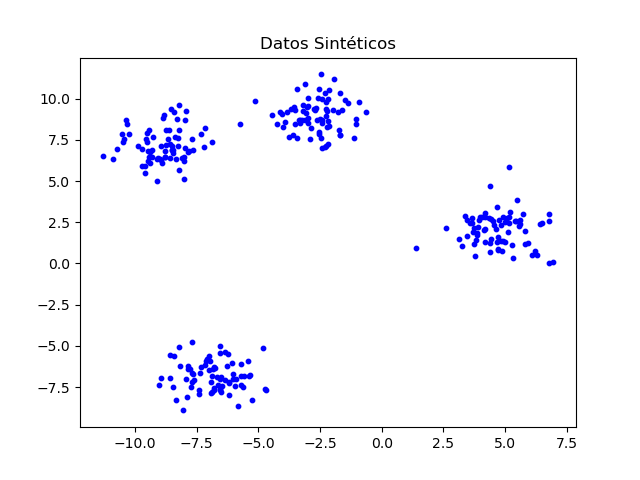

In [8]:
# Generar datos sintéticos
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Visualizar los datos sintéticos
plt.figure('Datos simulados')
plt.scatter(X[:, 0], X[:, 1], c='blue', s=10, cmap='viridis')
plt.title('Datos Sintéticos')
plt.show()

<IPython.core.display.Javascript object>


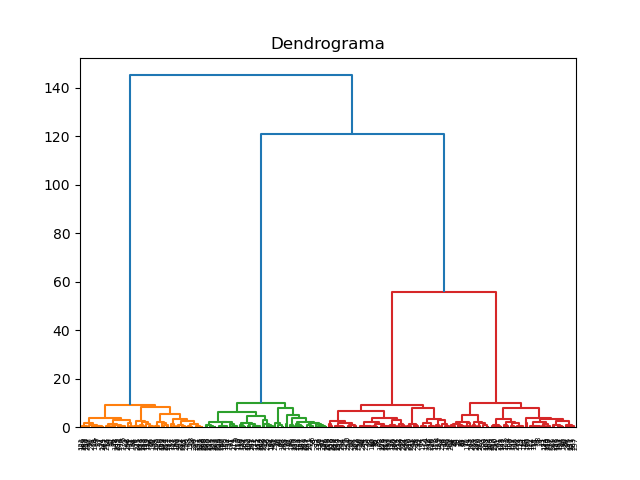

In [9]:
# Usar clustering jerárquico
# Enlace de Ward es un método común para el clustering jerárquico
linkage_matrix = linkage(X, 'ward')

# Visualizar el dendrograma
plt.figure('Dendograma')
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<IPython.core.display.Javascript object>


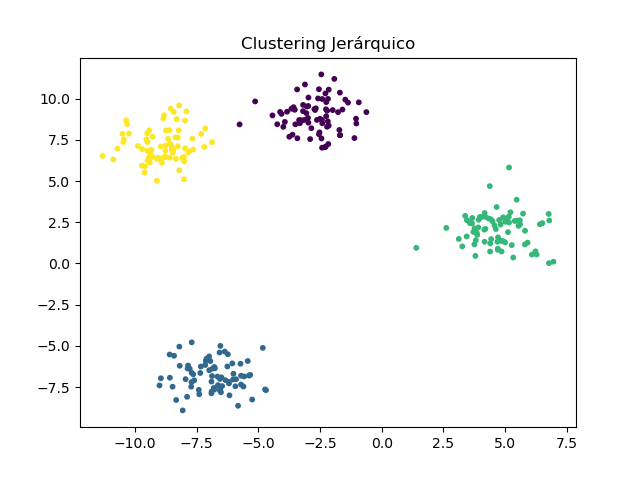

In [10]:
# Aplicar el clustering jerárquico
num_clusters = 4
hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(X)

# Visualizar los clusters
plt.figure('Cluster')
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=10, cmap='viridis')
plt.title('Clustering Jerárquico')
plt.show()

## K means

In [11]:
from sklearn.cluster import KMeans

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

<IPython.core.display.Javascript object>


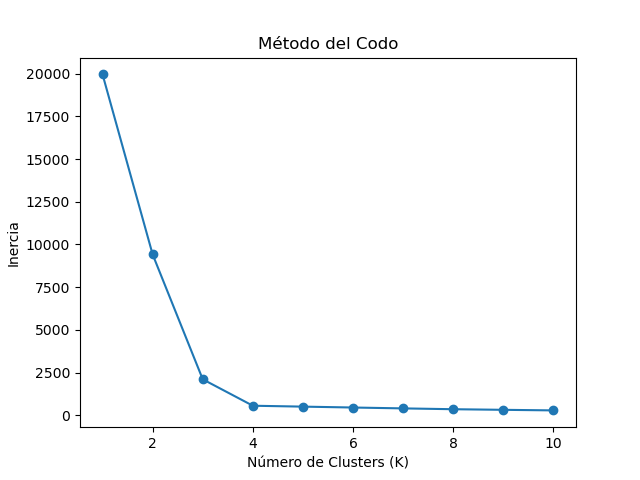

In [12]:
# Método del codo
inertia = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure('Metodo del codo')
plt.plot(possible_k_values, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<IPython.core.display.Javascript object>


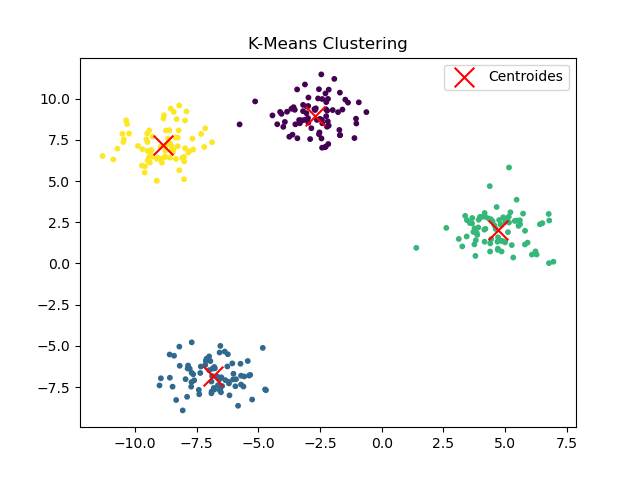

In [14]:
# Aplicar k-means
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Visualizar los clusters
plt.figure('Kmeans')
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=10, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

## K Prototypes

In [ ]:
#pip install kmodes

In [15]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler

In [17]:
# Variables numéricas
numeric_data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Variables categóricas (simuladas como strings)
categorical_data = np.random.choice(['A', 'B', 'C'], size=(300, 2))

# Combinar variables numéricas y categóricas
data = np.hstack([numeric_data, categorical_data])

# Convertir a DataFrame para facilitar la manipulación
columns = [f'numeric_{i}' for i in range(numeric_data.shape[1])] + ['categorical_1', 'categorical_2']
df = pd.DataFrame(data, columns=columns)

# Escalar las variables numéricas
scaler = StandardScaler()
df[['numeric_0', 'numeric_1']] = scaler.fit_transform(df[['numeric_0', 'numeric_1']])

In [18]:
# Visualizar los datos
print(df.head())

   numeric_0  numeric_1 categorical_1 categorical_2
0  -1.116190   0.583772             A             A
1  -1.192142   0.658633             A             A
2   0.325204   0.796111             B             C
3  -0.699477  -1.387959             A             B
4  -1.415179   0.558312             A             A


In [19]:
# Aplicar KPrototypes
num_clusters = 4
kproto = KPrototypes(n_clusters=num_clusters, init='Huang', verbose=2)
clusters = kproto.fit_predict(df.values, categorical=[2, 3])

# Añadir las asignaciones de cluster al DataFrame original
df['cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 45, ncost: 235.74429672203522
Run: 1, iteration: 2/100, moves: 3, ncost: 234.9569472912369
Run: 1, iteration: 3/100, moves: 0, ncost: 234.9569472912369
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 40, ncost: 198.94450769054572
Run: 2, iteration: 2/100, moves: 3, ncost: 198.9110374474455
Run: 2, iteration: 3/100, moves: 0, ncost: 198.9110374474455
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 84, ncost: 279.8710122563167
Run: 3, iteration: 2/100, moves: 60, ncost: 248.93401398947012
Run: 3, iteration: 3/100, moves: 26, ncost: 235.13667543709812
Run: 3, iteration: 4/100, moves: 2, ncost: 235.09798262374466
Run: 3, iteration: 5/100, 

In [20]:
# Visualizar los clusters
print(df['cluster'].value_counts())

3    75
2    75
1    75
0    75
Name: cluster, dtype: int64


## DBSCAN

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

<IPython.core.display.Javascript object>


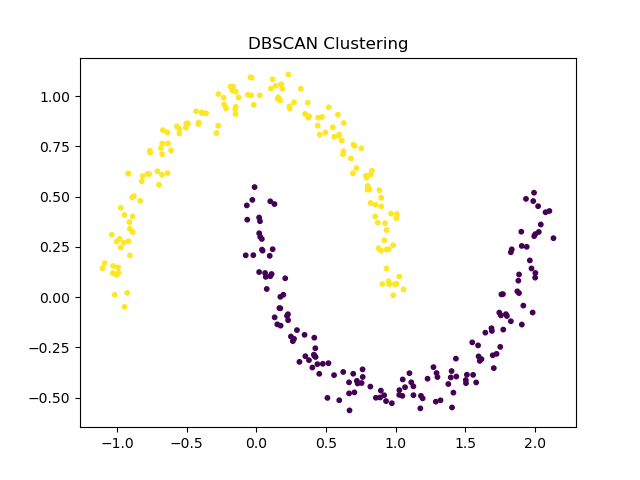

In [22]:
# Generar datos sintéticos en forma de lunas
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Escalar los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar DBSCAN
eps = 0.5  # Radio de la vecindad
min_samples = 5  # Número mínimo de puntos en una vecindad para formar un cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X_scaled)

# Visualizar los resultados
plt.figure('DBSCAN')
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering')
plt.show()


## Metricas de validacion

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [25]:
# Generar datos sintéticos en forma de lunas
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Escalar los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar KMeans
num_clusters_kmeans = 2
kmeans = KMeans(n_clusters=num_clusters_kmeans, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Aplicar DBSCAN
eps_dbscan = 0.3  # Radio de la vecindad
min_samples_dbscan = 5  # Número mínimo de puntos en una vecindad para formar un cluster
dbscan = DBSCAN(eps=eps_dbscan, min_samples=min_samples_dbscan)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Aplicar clustering jerárquico
num_clusters_hierarchical = 2
hierarchical = AgglomerativeClustering(n_clusters=num_clusters_hierarchical)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Calcular el coeficiente de silueta
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_labels)

# Calcular el índice de Davies-Bouldin
db_index_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)
db_index_dbscan = davies_bouldin_score(X_scaled, dbscan_labels)
db_index_hierarchical = davies_bouldin_score(X_scaled, hierarchical_labels)

# Imprimir resultados
print("Resultados de KMeans:")
print(f"Coeficiente de Silueta: {silhouette_kmeans}")
print(f"Índice de Davies-Bouldin: {db_index_kmeans}\n")

print("Resultados de DBSCAN:")
print(f"Coeficiente de Silueta: {silhouette_dbscan}")
print(f"Índice de Davies-Bouldin: {db_index_dbscan}\n")

print("Resultados de Clustering Jerárquico:")
print(f"Coeficiente de Silueta: {silhouette_hierarchical}")
print(f"Índice de Davies-Bouldin: {db_index_hierarchical}\n")

Resultados de KMeans:
Coeficiente de Silueta: 0.4953633920108147
Índice de Davies-Bouldin: 0.8067419199788752

Resultados de DBSCAN:
Coeficiente de Silueta: 0.3860259972372984
Índice de Davies-Bouldin: 1.0211026213282552

Resultados de Clustering Jerárquico:
Coeficiente de Silueta: 0.44869301738617196
Índice de Davies-Bouldin: 0.8404986914030765



/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<IPython.core.display.Javascript object>


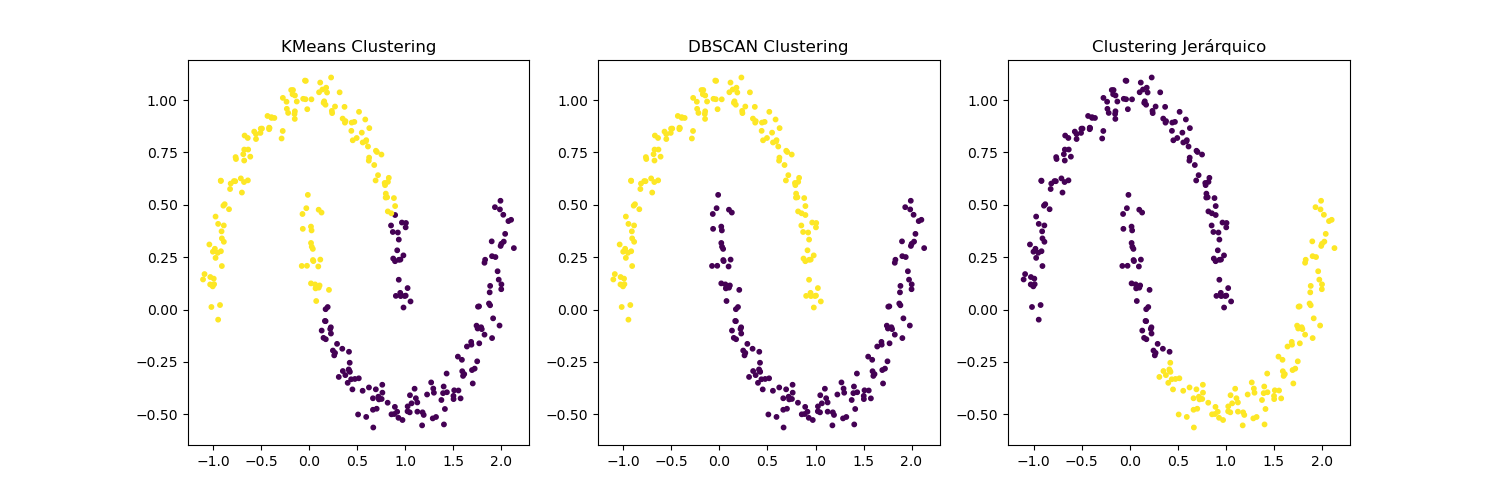

In [26]:
plt.figure('Comparacion',figsize=(15, 5))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('KMeans Clustering')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis', s=10)
plt.title('Clustering Jerárquico')

plt.show()